# Лабораторная работа 

# №10. Линейные стационарные системы

## Писарик Максим, 5130901/10101

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
from thinkdsp import read_wave

## УПРАЖНЕНИЕ 10.1

В данном упражнении необходимо изменить пример в chap10.ipynb и убедиться, что дополнение нулями устраняет лишнюю ноту в начале фрагмента.

Урежем оба сигнала до $2^{16}$ элементов, а затем дополним их нулями до $2^{17}$.

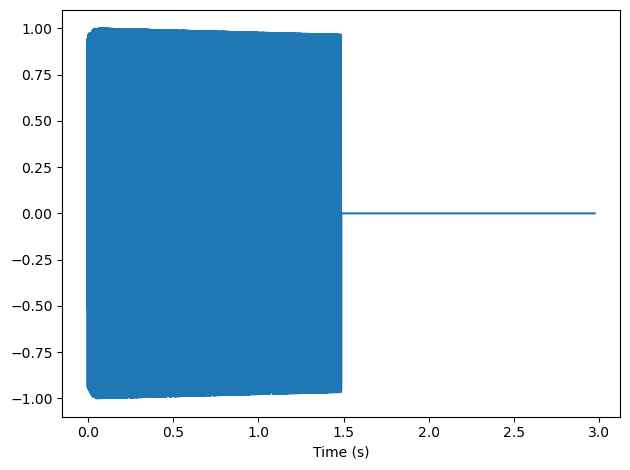

In [4]:
response = read_wave('18871__zippi1__sound-bell-440hz.wav')
start = 0.12
response = response.segment(start=start)
response.shift(-start)
response.truncate(2**16)
response.zero_pad(2**17)
response.normalize()
response.plot()
decorate(xlabel='Time (s)')

Вычислим спектр:

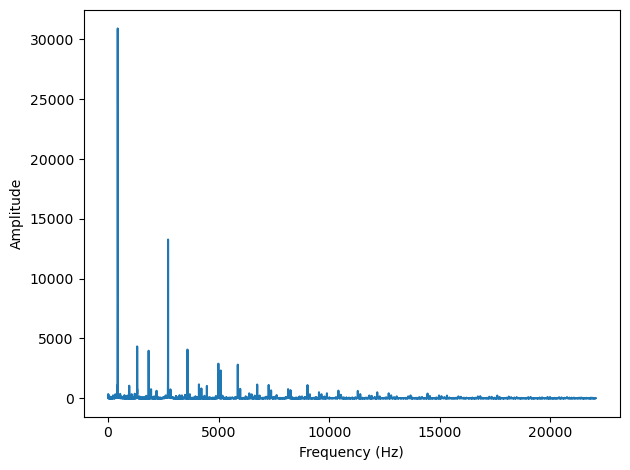

In [5]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Другой сигнал:

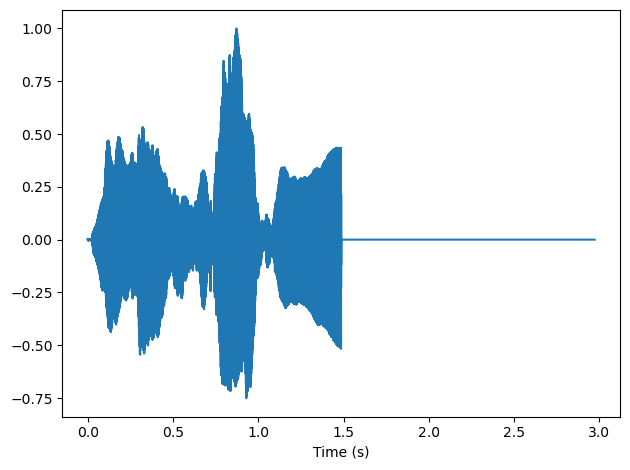

In [6]:
violin = read_wave('92002__jcveliz__violin-origional.wav')
start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)
violin.truncate(2**16)
violin.zero_pad(2**17)
violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

Вычислим спектр:

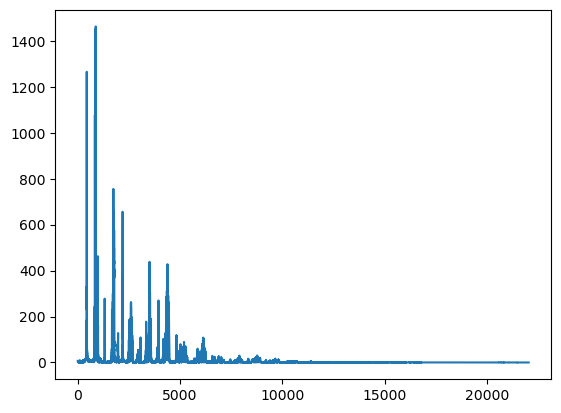

In [7]:
spectrum = violin.make_spectrum()
spectrum.plot()

Далее умножим ДПФ сигнала на передаточную функцию и преобразуем обратно в сигнал:

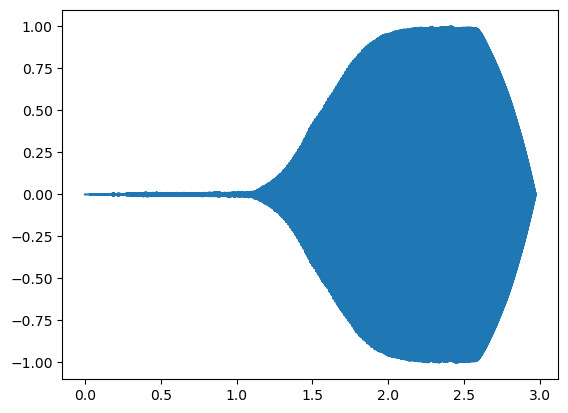

In [8]:
output = (spectrum * transfer).make_wave()
output.normalize()
output.plot()
output.make_audio()

Теперь мы не слышим лишнюю ноту в начале сегмента.

## УПРАЖНЕНИЕ 10.2

В данном упражнении необходимо скачать импульсную характеристику с сайта https://www.openairlib.net/, смоделировать двумя способами звучание записи в том пространстве, где была измерена импульсная характеристика, как сверткой самой записи с импульсной характеристикой, так и умножением ДПФ записи на вычисленный фильтр, соответствующий импульсной характеристике.

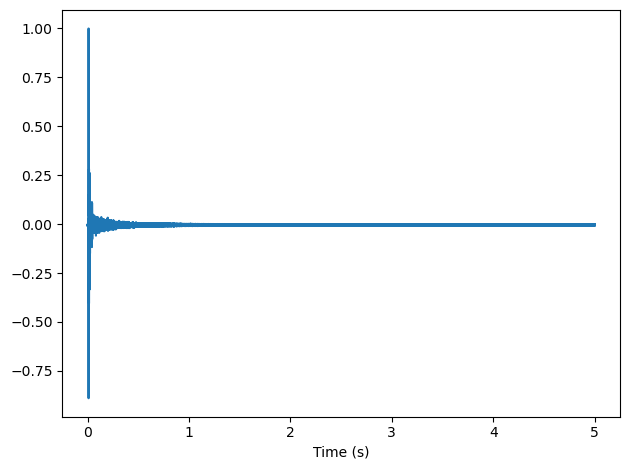

In [9]:
response = read_wave('stalbans.wav')
start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)
response.normalize()
response.plot()
decorate(xlabel='Time (s)')

ДПФ импульсной характеристики является передаточной функцией

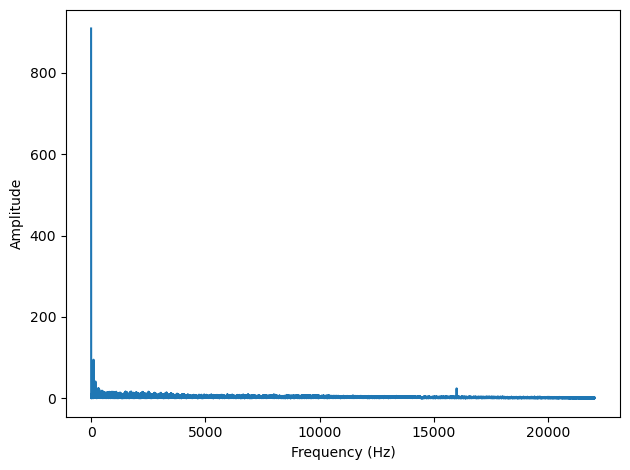

In [10]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Передаточная функция в двойном логарифмическом масштабе:

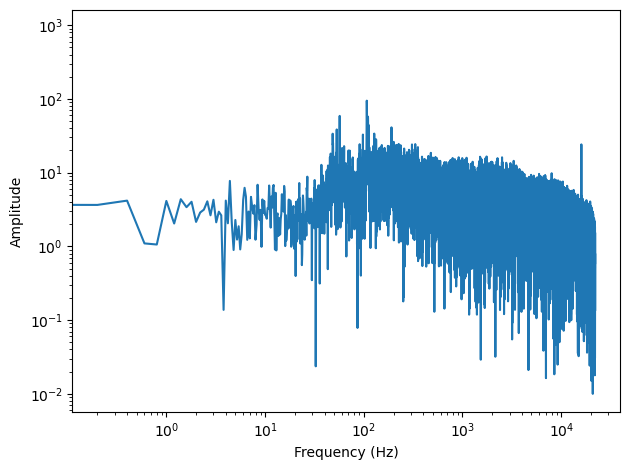

In [11]:
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude', xscale='log', yscale='log')

Теперь мы можем смоделировать звучание записи, как если бы ее воспроизвели в той же комнате и записали бы таким же образом.

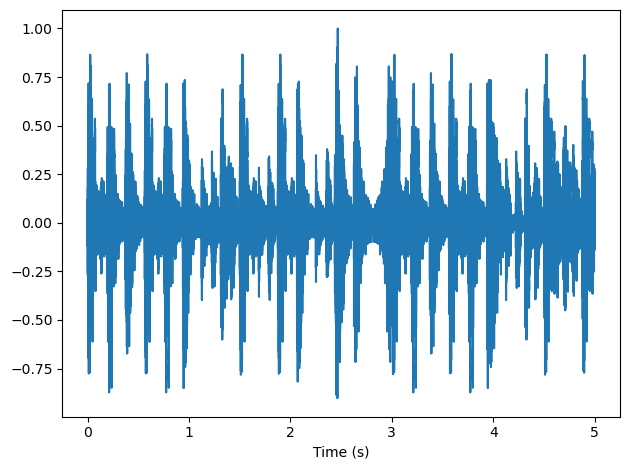

In [13]:
wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)
wave.truncate(len(response))
wave.normalize()
wave.plot()
decorate(xlabel='Time (s)')

Вычислим ДПФ записи:

In [14]:
spectrum = wave.make_spectrum()
len(spectrum.hs), len(transfer.hs)
spectrum.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

In [15]:
transfer.fs

array([0.00000e+00, 2.00000e-01, 4.00000e-01, ..., 2.20496e+04,
       2.20498e+04, 2.20500e+04])

Выполним умножение в частотной области и преобразуем обратно во временную область.

In [16]:
output = (spectrum * transfer).make_wave()
output.normalize()

Сравним оригинальную и преобразованную запись:

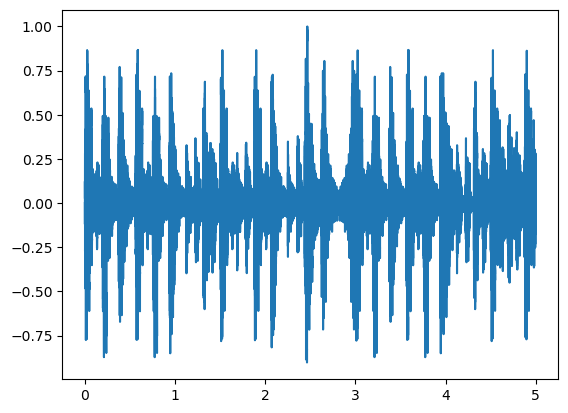

In [17]:
wave.plot()

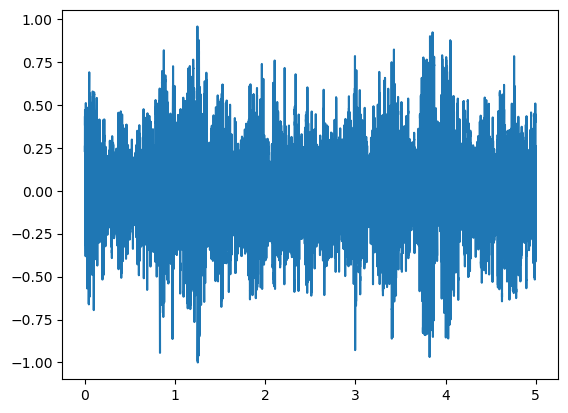

In [18]:
output.plot()

Прослушаем сигнал:

In [19]:
output.make_audio()

Теперь, когда мы распознаем эту операцию как свертку, мы можем вычислить ее с помощью метода convolve:

In [20]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()